Tensorflow에서 MNSIT 읽기

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2023-10-31 16:09:36.160778: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 16:09:36.160807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 16:09:36.160825: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 16:09:36.166456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 16:09:36.997771: W tensorflow/compiler/

one-hot-encoding

#### 이 타이밍에 one-hot-encoding을 해야 한다.
#### 그런데 또 하나의 방법이 loss 함수를 sparse_categorical_crossentropy 로 설정하면 같은 효과이다.
#### 그래서 pass~

1.5 모델을 만들어보자

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28, 28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

2023-10-31 16:09:41.967389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 16:09:42.026503: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 16:09:42.026830: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1.6 다시 한 번 더 softmax란?

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# !pip install numba
# from numba import cuda
# device = cuda.get_current_device()
# device.reset()

1.9 fit~

In [6]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs = 10, batch_size = 10, verbose =1)

print('Fit time: ', time.time() - start_time)

Epoch 1/10


2023-10-31 16:09:50.203102: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f79006f0290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 16:09:50.203125: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-10-31 16:09:50.210357: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 16:09:51.813996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-10-31 16:09:51.905906: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6000/6000 [==============================] - 17s 2ms/step - loss: 0.1737 - accuracy: 0.9465 - val_loss: 0.0951 - val_accuracy: 0.9692
Epoch 2/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0803 - accuracy: 0.9751 - val_loss: 0.0885 - val_accuracy: 0.9754
Epoch 3/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 0.0883 - val_accuracy: 0.9752
Epoch 4/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0870 - val_accuracy: 0.9780
Epoch 5/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0897 - val_accuracy: 0.9789
Epoch 6/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.1197 - val_accuracy: 0.9764
Epoch 7/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0291 - accuracy: 0.9918 - val_loss: 0.1299 - val_accuracy: 0.9

1.10 acc와 loss를 그려보자

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

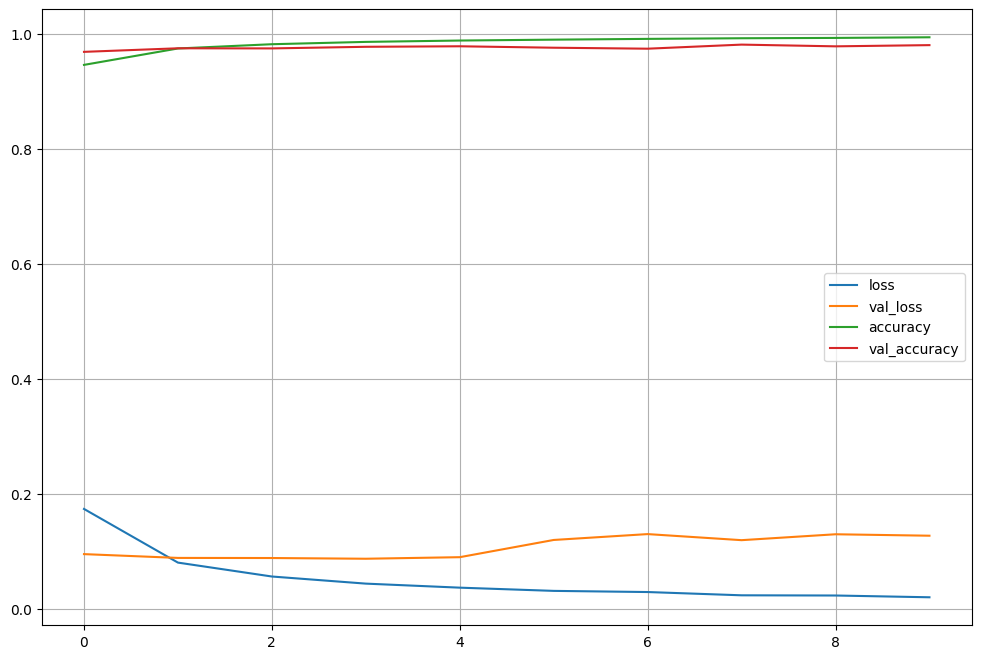

In [9]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label =each)

plt.legend()
plt.grid()
plt.show()

1.12 머신러닝에서 93%쯤 나왔던 결과대비 5%쯤 향상되었다

In [11]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1271 - accuracy: 0.9809


1.13 뭐가 틀렸나 확인해보자

In [14]:
import numpy as np

predicted_result = model.predict(x_test)
predict_labels = np.argmax(predicted_result, axis=1)
predict_labels[:10]

313/313 [==============================] - 0s 810us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [15]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [16]:
wrong_result = []

for n in range(0, len(y_test)):
    if predict_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

191

In [17]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[1328,
 720,
 8277,
 9634,
 2004,
 1581,
 1014,
 2093,
 3762,
 495,
 4078,
 9745,
 5734,
 4635,
 4078,
 9009]

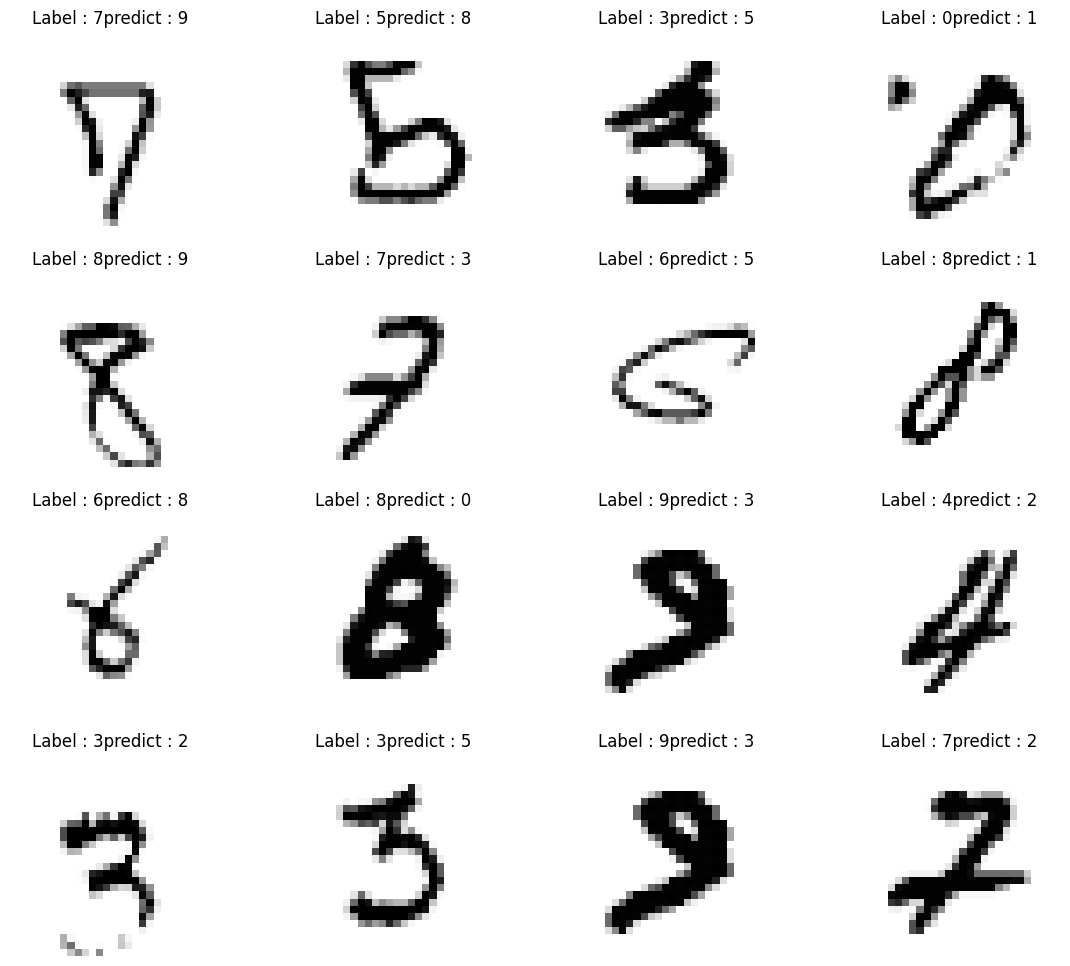

In [20]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : '+ str(y_test[n])+ 'predict : ' + str(predict_labels[n]))
    plt.axis('off')
plt.show()

1 CNN
1.11 MaxPooling

In [2]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test)= mnist.load_data()
X_train, X_test= X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

2023-10-31 17:02:50.240928: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 17:02:50.240953: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 17:02:50.240971: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 17:02:50.245764: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 17:02:50.986339: W tensorflow/compiler/

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size =(5,5),strides =(1,1), activation = 'relu', padding ='same', input_shape = (28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)),
    layers.Conv2D(64, (2,2), activation = 'relu', padding ='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation ='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

2023-10-31 17:03:13.091087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 17:03:13.134455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 17:03:13.134628: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
import time

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs =5, verbose =1, validation_data=(X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/5


2023-10-31 17:03:27.903931: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-10-31 17:03:29.014814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-10-31 17:03:31.254521: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f285fd21ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 17:03:31.254541: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-10-31 17:03:31.258034: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 17:03:31.327578: I ./tensorflow/compiler/jit/device_compiler.h:186] Comp

1875/1875 [==============================] - 10s 3ms/step - loss: 0.1157 - accuracy: 0.9634 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0293 - val_accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0316 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0264 - val_accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0309 - val_accuracy: 0.9894
fit time :  35.32322669029236


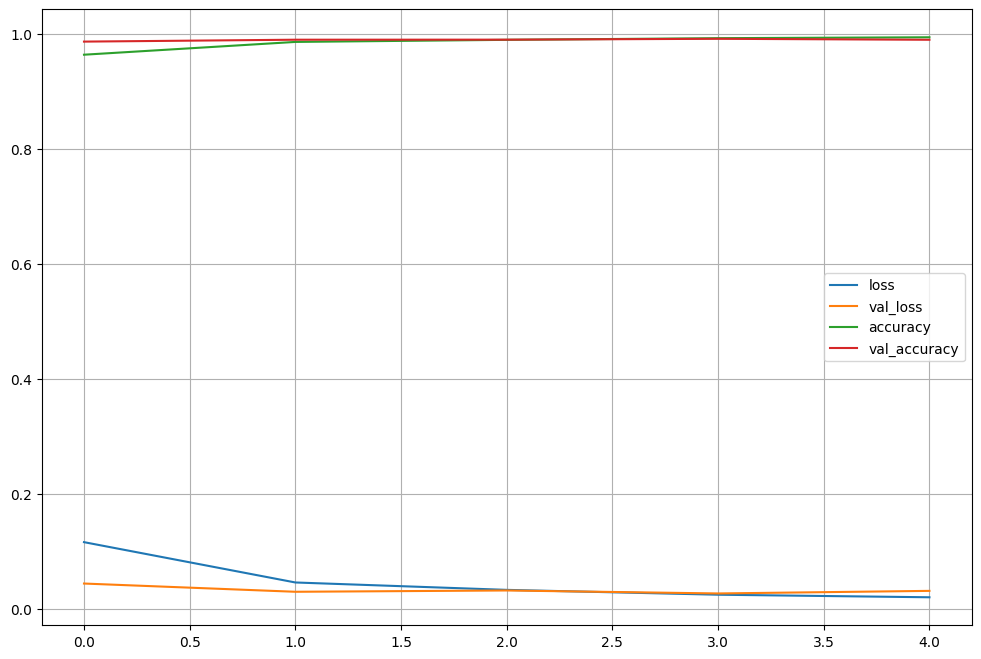

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12,8))

for each in plot_target:
    plt.plot(hist.history[each], label =each)

plt.legend()
plt.grid()
plt.show()

2.8 Test Accuracy 99%

In [8]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9894
Test loss : 0.030926156789064407
Test accuracy: 0.9894000291824341


2.9 다시 틀린 데이터 찾으러 가자

In [12]:
import numpy as np

predicted_result = model.predict(X_test)
predict_labels = np.argmax(predicted_result, axis =1)
predicted_labels[:10]

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

2.10 틀린 데이터를 모으고

In [13]:
wrong_result = []

for n in range(0, len(y_test)):
    if predict_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

106

2.11 틀린 것 중에 16개만

In [14]:
import random

samples = random.choices(population = wrong_result, k= 16)
samples

[6625,
 6065,
 448,
 3767,
 2135,
 1039,
 495,
 2043,
 1901,
 1790,
 7849,
 1228,
 4500,
 659,
 1202,
 3808]

2.12 직접 볼까

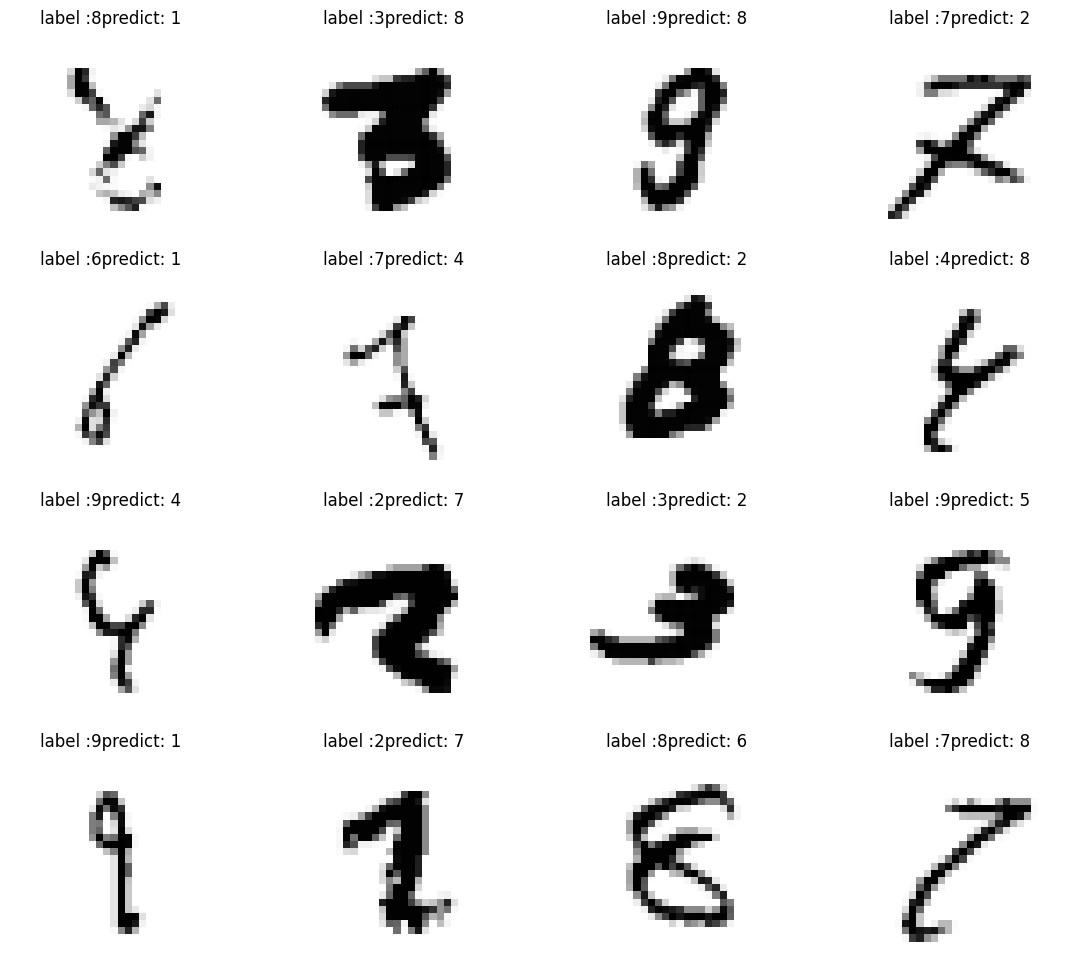

In [17]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap ='Greys', interpolation='nearest')
    plt.title('label :'+ str(y_test[n])+'predict: '+ str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [18]:
model.save('MNIST_CNN_model.h5')

/home/kang/venv/deep_running/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
